In [1]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc

# Data import to get r and t
data = np.genfromtxt("../Example Data/real_eyemovement_001_1kHz.csv", delimiter=',')
df = pd.DataFrame(data)
data_interpolate = df.interpolate(limit_direction='both')
data1 = pd.DataFrame.to_numpy(data_interpolate)
data2 = data1.transpose()

t = (data2[0])
x = (data2[2])
y = (data2[1])
r = np.sqrt(x**2+y**2)            # Radial component of x and y data

# Getting x and y data amd inserting r into data frame
eye_movement_data = pd.read_csv("../Example Data/real_eyemovement_001_1kHz.csv", usecols=[0,1,2], header=None, index_col=0)
eye_movement_data = eye_movement_data.interpolate(limit_direction='both')
eye_movement_data['Time'] = pd.to_datetime(t, unit='s', dayfirst=True)
eye_movement_data['r'] = r
eye_movement_data = eye_movement_data.set_index('Time')
eye_movement_data.columns = ['y','x', 'r']

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [2]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [3]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [4]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(avlogdiv, n, m2, m1, c1, c2):

    func_to_min = m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

    return func_to_min

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

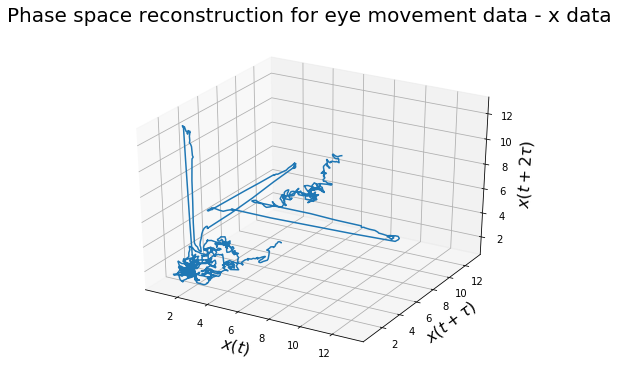

In [24]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x, 55, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

(3.475, 3.484)

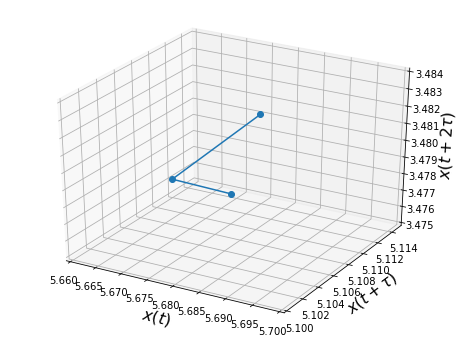

In [6]:
fig1 = plt.figure()
fig1.set_size_inches(8,6)
ax = plt.axes(projection='3d')

x0 = [embedded_x_final[0,0], embedded_x_final[0,1], embedded_x_final[0,2]]
y0 = [embedded_x_final[1,0], embedded_x_final[1,1], embedded_x_final[1,2]]
z0 = [embedded_x_final[2,0], embedded_x_final[2,1], embedded_x_final[2,2]]

ax.plot3D(x0, y0,z0, marker='o')
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_xlim(5.660,5.7)
ax.set_ylim(5.1,5.115)
ax.set_zlim(3.475,3.484)


Text(0.5, 0, '$y(t+2τ)$')

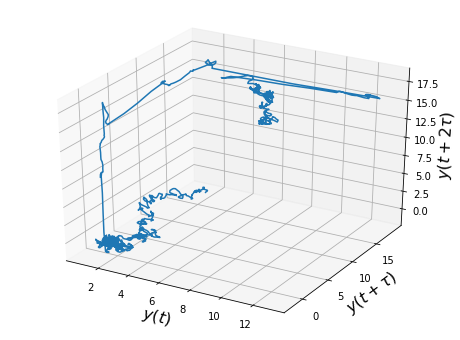

In [7]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y, 55, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$y(t)$', fontsize=16)
ax.set_ylabel('$y(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$y(t+2\u03C4)$', fontsize=16)

Text(0.5, 0, '$r(t+2τ)$')

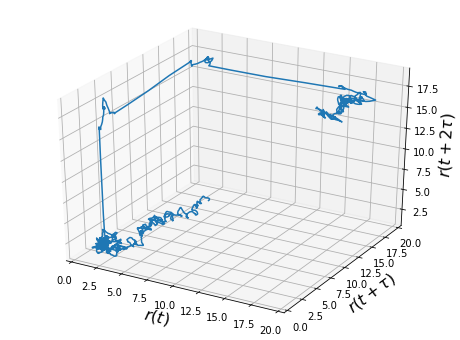

In [8]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r, 55, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

249.87053340238214
The period of x data is 0.004002072538860105 seconds


Text(0, 0.5, 'Power')

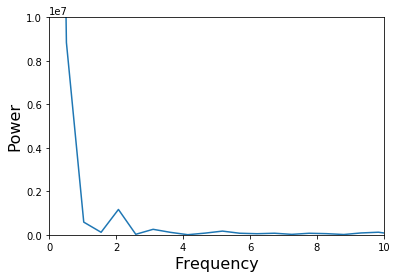

In [9]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)


The period of x data is 0.004002072538860105 seconds


Text(0, 0.5, 'Power')

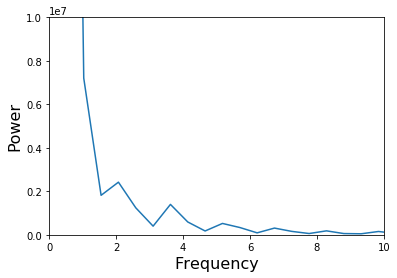

In [10]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of x data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of x data is 0.004002072538860105 seconds


Text(0, 0.5, 'Power')

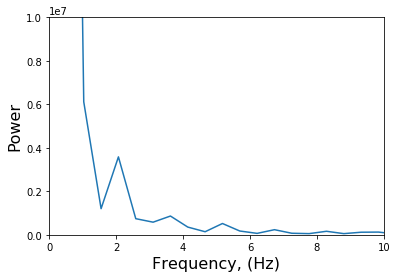

In [11]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of x data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [12]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[6])

[   6    5    4    7    3    1    2    8    0    9   10   11   14   13
   12   15   16   17   18   24   26   25   27   23   19   22   28   20
   21   29   30   31   32   46   47   45   48   33   49   44   50   34
   51   43   35   52   36   42   53   60   57   59   58   56   61   37
   55   54   41   38   40   39   62   63   64 1261   65   66   67   69
   68   70   71   72  349   73  348   74  350  352  351   75 1296  338
  341  347  337   77   82  353   76   81   78   79  340 1320   83  354
  342   80  339 1308 1321  336  355   84  346  343 1309  334  335 1319
  344  345  333  294  356 1310  308   85 1307  295  296 1311  305  332
  306  307  297 1318 1322  293  357 1312  304  331   86 1336  309  298
  330  329 1335  322  303  327  328  321  292 1317 1306 1262 1337   87
  302  319  320  358  291  299  326 1334  290 1323  289 1313  359  316
  360  301  310   88  323  315 1305  318  300 1338  361 1316  362 1297
  288  317  286 1315  325  287  314  255  254  382 1314  283  313  256
  378 

In [13]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])


[  0   1  19  18  20   2  21  41  39  45  43  40  44  42  22  17  38  46
   7  23   6  16   3  27  47   8  26  25  24  37   5  15  36  35  28   4
  14  34  68  48  33   9  32  13  10  29  69  50  49  31  51  12  70  30
  90  11  89  52  91  92  67  56  53  66  57  55  71  88  54  93  65  87
  58  64  94  86  85  63  72  95  84  60  62  59  61  73 100  96  83  74
  97  99  98 101  75 104 102  81  76  82  80  78 105  79  77 103 106 107
 108 109 111 110 112 125 124 126 123 113 145 127 146 144 147 148 128 122
 143 149 114 142 129 121 140 141 150 115 130 139 120 119 117 116 118 131
 151 138 156 155 152 132 157 154 136 137 133 135 153 134 158 159 160 161
 168 167 166 162 165 169 163 164 170 171 172 190 180 183 178 181 179 184
 182 173 191 189 185 192 193 174 194 188 195 186 187 177 176 175 196 197
 198 200]


In [14]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   2   6   7   3   5   4   8  10  12  13   9  11  14  19  18  15
  17  16  20  23  21  24  22  26  25  27  28  29  30  31  32  45  33  46
  34  44  47  35  43  48  36  38  37  49  39  42  40  41  50  51  52  53
  57  56  58  64  66  55  54  65  68  63  67  60  59  69  61  62  70  71
  72  85  73  84  86  88  87  89  74  83  90  75  81  78  82  79  91  80
  76  77  92  93 100 101 104  94 102  99 103 105  95  98  97  96 106 107
 108 109 111 112 110 123 124 125 145 126 113 146 144 122 147 143 127 121
 114 148 142 115 119 128 118 120 116 141 149 140 117 129 139 150 130 138
 131 151 152 132 137 133 136 153 134 135 155 154 156 159 157 158 160 161
 181 167 200 180 162 183 182 179 166 165 168 178 199 164 163 201 184 198
 185 202 169 197 203 204 170 196 195 186 177 194 205 171 187 188 190 193
 189 206]


1.093302337688667
0.0775475411050987


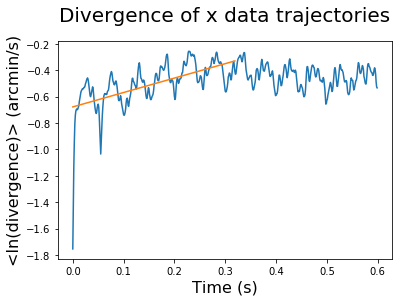

In [25]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 600
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
t_regx = t[0:320].reshape(-1,1)
divx_reg = av_log_div_x[0:320].reshape(-1,1)

reg_x = LinearRegression().fit(t_regx, divx_reg)
grad_x = reg_x.coef_.item()
intercept_x = reg_x.intercept_.item()


resx = av_log_div_x[0:320] - (t[0:320]*grad_x + intercept_x)
resx_sq = np.sum(resx**2)
tmean = np.mean(t[0:320])
ttx = np.sum((t[0:320]-tmean)**2)

error_x = np.sqrt((1/318)*(resx_sq/ttx))

plt.plot(t[0:600], av_log_div_x)
plt.plot(t[0:320], t[0:320]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


print(grad_x)
print(error_x)


0.6992661998672177
0.41968339425223145


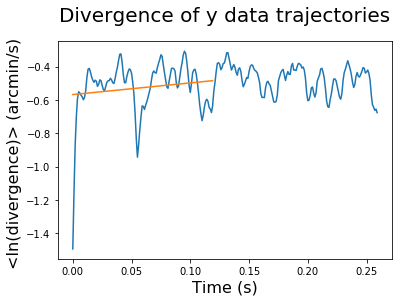

In [16]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 260
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
t_regy = t[0:120].reshape(-1,1)
divy_reg = av_log_div_y[0:120].reshape(-1,1)

reg_y = LinearRegression().fit(t_regy, divy_reg)
grad_y = reg_y.coef_.item()
intercept_y = reg_y.intercept_.item()

resy = av_log_div_y[0:120] - (t[0:120]*grad_y + intercept_y)
resy_sq = np.sum(resy**2)
tmean_y = np.mean(t[0:120])
tty = np.sum((t[0:120]-tmean_y)**2)

error_y = np.sqrt((1/118)*(resy_sq/tty))

plt.plot(t[0:260], av_log_div_y)
plt.plot(t[0:120], t[0:120]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

print(grad_y)
print(error_y)


0.8665015203179376
0.14222683795661628


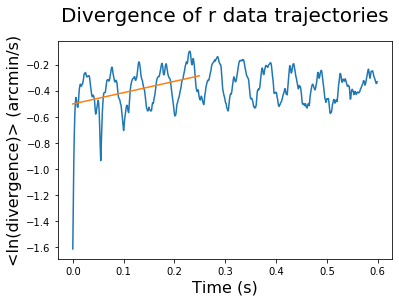

In [17]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 600
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
t_regr = t[0:250].reshape(-1,1)
divr_reg = av_log_div_r[0:250].reshape(-1,1)

reg_r = LinearRegression().fit(t_regr, divr_reg)
grad_r = reg_r.coef_.item()
intercept_r = reg_r.intercept_.item()

resr = av_log_div_r[0:250] - (t[0:250]*grad_r + intercept_r)
resr_sq = np.sum(resr**2)
tmean_r = np.mean(t[0:250])
ttr = np.sum((t[0:250]-tmean_r)**2)

error_r = np.sqrt((1/248)*(resr_sq/ttr))

plt.plot(t[0:600], av_log_div_r)
plt.plot(t[0:250], t[0:250]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

print(grad_r)
print(error_r)